In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
df['Embarked'].mode()[0]

'S'

In [16]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
df.drop('Cabin',axis = 1,inplace=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [24]:
df['Sex'] = le.fit_transform(df['Sex'])

In [26]:
df = pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


In [28]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(4)
memory usage: 47.1 KB


In [31]:
numerical_cols = ['Age','Fare','Pclass','SibSp','Parch']

In [32]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,0.827377,1,-0.565736,0.432793,-0.473674,-0.502445,False,True
1,1,-1.566107,0,0.663861,0.432793,-0.473674,0.786845,False,False
2,1,0.827377,0,-0.258337,-0.474545,-0.473674,-0.488854,False,True
3,1,-1.566107,0,0.433312,0.432793,-0.473674,0.420730,False,True
4,0,0.827377,1,0.433312,-0.474545,-0.473674,-0.486337,False,True


In [39]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,8.910000e+02,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,-8.772133e-17,0.647587,2.272780e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,0.486592,1.000562e+00,0.477990,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,0.000000,-1.566107e+00,0.000000,-2.224156e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,0.000000,-3.693648e-01,0.000000,-5.657365e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000,8.273772e-01,1.000000,-1.046374e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,1.000000,8.273772e-01,1.000000,4.333115e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,1.000000,8.273772e-01,1.000000,3.891554e+00,6.784163e+00,6.974147e+00,9.667167e+00


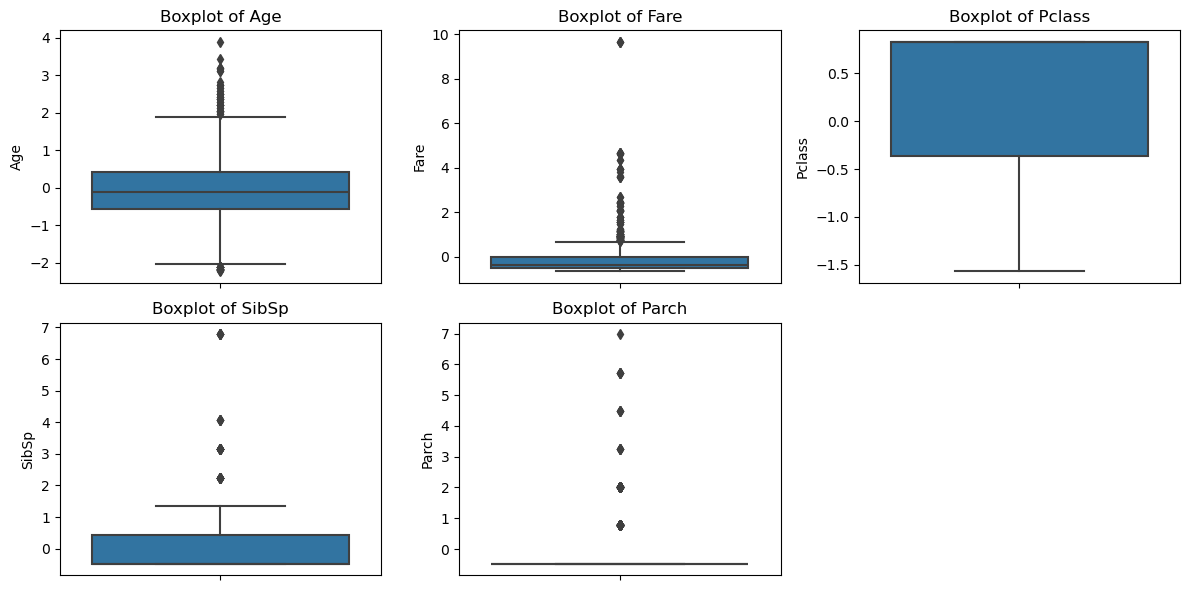

In [42]:
plt.figure(figsize=(12,6))
for i,col in enumerate(numerical_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [44]:
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

lower_bound_fare = Q1_fare - 1.5*IQR_fare
upper_bound_fare = Q3_fare + 1.5*IQR_fare
df_no_outliers = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

In [45]:
df.shape

(891, 9)

In [46]:
df_no_outliers.shape

(775, 9)

In [48]:
df = df_no_outliers.copy()

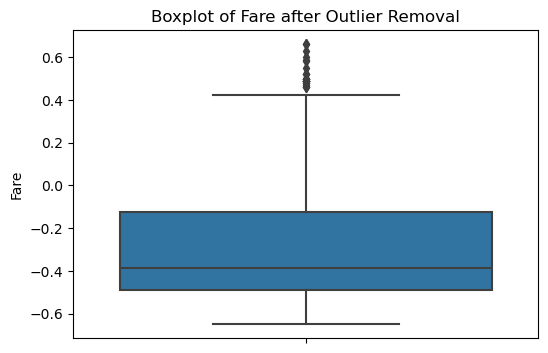

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare after Outlier Removal')
plt.show()

In [52]:
#final cleaned and preprocessed dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    775 non-null    int64  
 1   Pclass      775 non-null    float64
 2   Sex         775 non-null    int32  
 3   Age         775 non-null    float64
 4   SibSp       775 non-null    float64
 5   Parch       775 non-null    float64
 6   Fare        775 non-null    float64
 7   Embarked_Q  775 non-null    bool   
 8   Embarked_S  775 non-null    bool   
dtypes: bool(2), float64(5), int32(1), int64(1)
memory usage: 46.9 KB


In [53]:
#final cleaned and preprocessed dataframe head
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,0.827377,1,-0.565736,0.432793,-0.473674,-0.502445,False,True
2,1,0.827377,0,-0.258337,-0.474545,-0.473674,-0.488854,False,True
3,1,-1.566107,0,0.433312,0.432793,-0.473674,0.420730,False,True
4,0,0.827377,1,0.433312,-0.474545,-0.473674,-0.486337,False,True
5,0,0.827377,1,-0.104637,-0.474545,-0.473674,-0.478116,True,False
